# In-Class Exercise: Simulating Gravity with Euler's Method

**Objective:** Use Euler's Method to simulate a falling object under different physical conditions.

### The Core Algorithm (Euler's Method)
We start with Newton's Second Law to find the acceleration (the slope of velocity).
Then we use the current state to predict the future state one small step ($dt$) at a time:

1. **Get Slope:** $a = F_{net} / m$
2. **Update Position:** $y_{new} = y_{old} + v_{old} \cdot dt$
3. **Update Velocity:** $v_{new} = v_{old} + a \cdot dt$
4. **Repeat**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Linear Drag (Recreating the Lecture)

Simulate a ball dropping with **Linear Air Resistance**. 

**The Physics:**
* Gravity: $F_g = -mg$
* Drag: $F_{drag} = -b v$ (Opposes velocity)
* Acceleration: $a = -g - (b/m)v$

**Parameters:**
* $y_0 = 100$ meters
* $v_0 = 0$ m/s
* $g = 9.81$ m/s$^2$
* $b = 0.5$ (Drag coefficient)
* $m = 1.0$ kg
* $dt = 0.05$ s

Text(0, 0.5, 'distance')

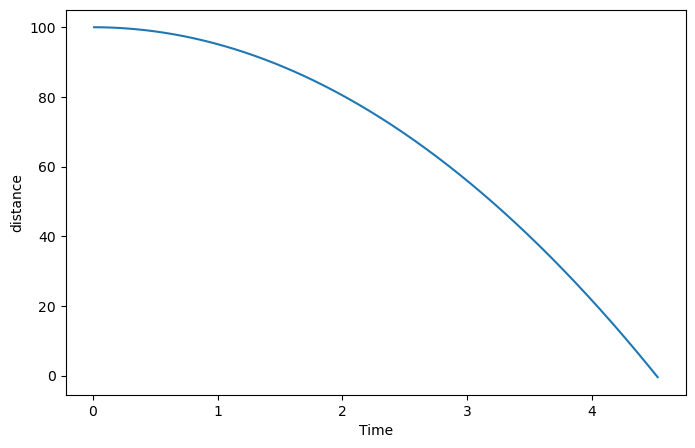

In [2]:
# 1. SETUP PARAMETERS
y = 100.0
v = 0.0
g = -1*9.81
b = 0.5
m = 1.0
dt = 0.01
F_g = m*g
F_drag = -1*b* v
F_net = F_drag + F_g
# Lists to store the history (for plotting): Initialize these here! 
t_list = []
y_list = []
v_list = []

# 2. THE SIMULATION LOOP
t = 0
while y > 0: # Run until it hits the ground
    
    # --- TODO: FILL IN THE PHYSICS HERE ---
    # 1. Calculate Acceleration (a = F_net / m)
    # Hint: Remember gravity points down (-), drag opposes velocity
    a = F_net/m #<--- REPLACE THIS
    #v = v + a * dt
    y = y + v * dt  #updating position
    v = v + a * dt
    # 4. Advance Time
    t += dt
    
    # Store results
    t_list.append(t)
    y_list.append(y)
    v_list.append(v)

# 3. PLOT
#Make sure to add an x label and y label with units, and give it a title and legend. 
plt.figure(figsize=(8,5))
plt.plot(t_list, y_list)
plt.xlabel('Time')
plt.ylabel('distance') 


## Part 2: The Vacuum Test (Verification)

How do we know our code actually works? We compare it to a problem we can solve by hand.

**The Task:**
1. Copy your loop from Part 1.
2. **Remove the drag term** from the acceleration line ($b=0$).
3. Plot your simulation on top of the exact kinematic equation: $y(t) = y_0 - \frac{1}{2}gt^2$.

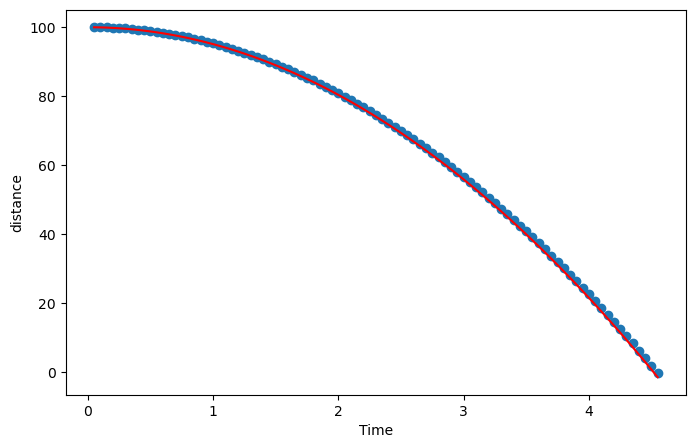

In [3]:
# Reset Initial Conditions
y = 100.0
v = 0.0
t = 0
#g = 9.8
dt = 0.05

#Initialize!
t_vac = []
y_vac = []

while y > 0: # Run until it hits the ground
    
    # --- TODO: FILL IN THE PHYSICS HERE ---
    # 1. Calculate Acceleration (a = F_net / m)
    # Hint: Remember gravity points down (-), drag opposes velocity
    a = F_net/m #<--- REPLACE THIS

    # 2. Update Position (Euler Step)
   
    y = y + v * dt  #updating position
    v = v + g * dt
    # 3. Update Velocity (Euler Step)
   
    
    # 4. Advance Time
    t += dt

    #store results
      # Store results
    t_vac.append(t)
    y_vac.append(y)
    v_list.append(v)


# ANALYTICAL SOLUTION (Kinematics)
t_array = np.array(t_vac)
y_exact = 100.0 - 0.5 * -1*g * t_array**2

# PLOT COMPARISON
#make sure you label your plots!


plt.figure(figsize=(8,5))
plt.scatter(t_vac, y_vac)
plt.xlabel('Time')
plt.ylabel('distance') 
plt.plot(t_array,y_exact, color = 'red')         # Line for theory

## Part 3: Quadratic Drag (The Physics Extension)

For most fast-moving objects (baseballs, rocks, cars), air resistance isn't proportional to $v$, it's proportional to $v^2$.

**The Physics:**
* $F_{drag} = -c v^2$ (approx)
* Acceleration: $a = -g + (c/m)v^2$ 
* *Note: Since the ball is falling down ($v$ is negative), $v^2$ is positive. Drag points UP (positive). So we add the term.*

**Task:**
Modify your loop to use Quadratic Drag. Use a coefficient $c = 0.05$.

Text(0, 0.5, 'distance')

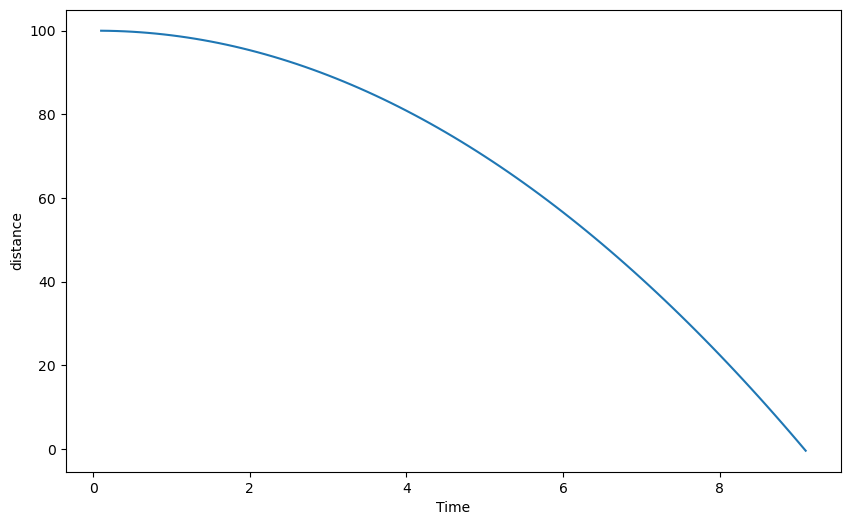

In [4]:
# Reset
y_2 = 100.0
v_2 = 0.0
t = 0
c = 0.05 # Quadratic drag coefficient
m_2 = 1.0
F_drag = -1*c*v**2
dt_2 = 0.1
t_quad = []
y_quad = []

while y_2 > 0:
    # --- TODO: MODIFY PHYSICS FOR V^2 DRAG ---
    # Remember: acceleration = -g + (DragForce / m)
    a = g+(c/m_2)*(v**2) # <--- REPLACE WITH QUADRATIC FORMULA
    
    # Euler Update (These lines usually stay the same!)
    y_2 = y_2 + v_2 * dt  #updating position
    v_2 = v_2 + g * dt
    t += dt_2
    
    t_quad.append(t)
    y_quad.append(y_2)

# PLOT ALL THREE TOGETHER
plt.figure(figsize=(10,6))
plt.plot(t_quad, y_quad)
plt.xlabel('Time')
plt.ylabel('distance') 

### Discussion Question
Look at Part 2 (Vacuum). Does the Simulation perfectly match the Exact line? If you zoom in, you might see them drifting apart. Why? How could you fix it?

Text(0, 0.5, 'theta')

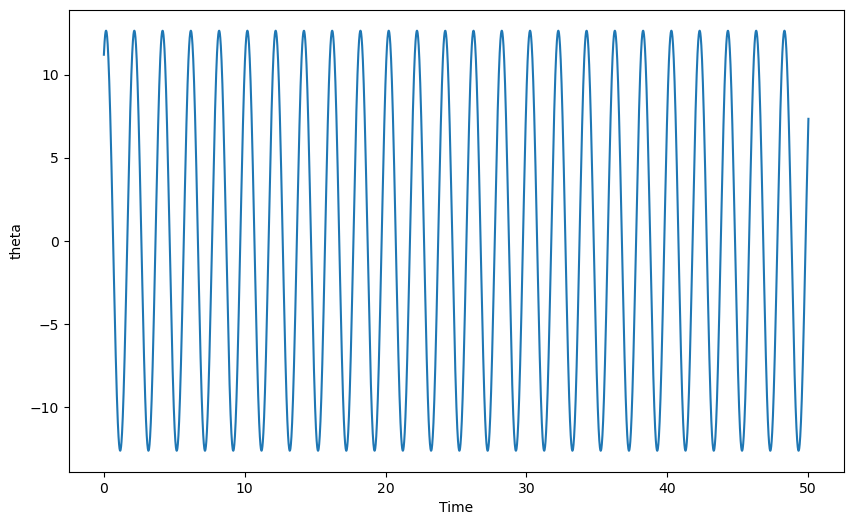

In [5]:
theta = 11
omega = 20
dt_2 = 0.01
g = -1*9.81 
L = 1 
t_2 = 0


theta_quad = []
t_2_quad = []  


while t_2 < 50:
    alpha =  (g/L)*theta 
    # Euler Update (These lines usually stay the same!)
    omega = omega + alpha * dt_2
    theta = theta + omega * dt_2
    #omega = omega + alpha * dt_2

    t_2 += dt_2
    t_2_quad.append(t_2)
    theta_quad.append(theta)

plt.figure(figsize=(10,6))
plt.plot(t_2_quad, theta_quad)
plt.xlabel('Time')
plt.ylabel('theta') 

-0.04341609726277821
50.0
49.95658390273722


Text(0, 0.5, 'energy')

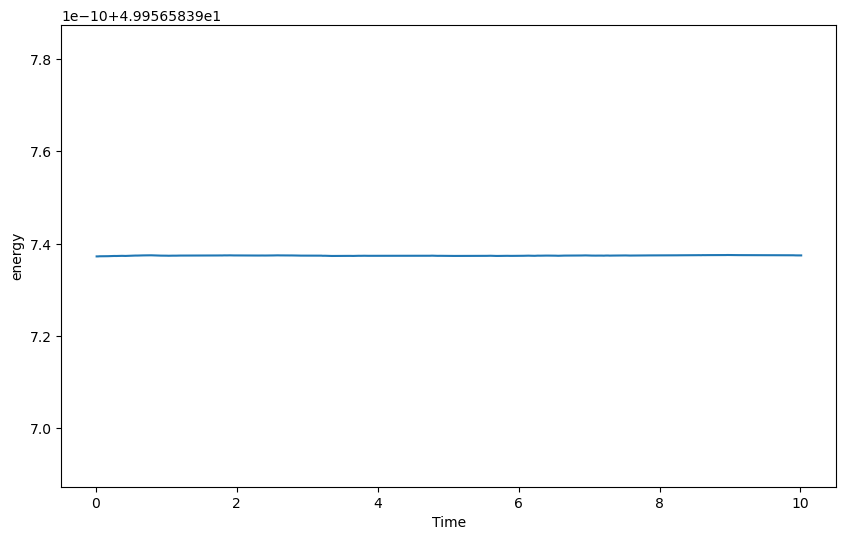

In [9]:
omega = 10
theta = 11
g = -9.81
m = 1
t_3 = 0
#omega = np.sqrt((-2*g*np.degrees(theta))/L)
KE = 0.5*m*(L*omega)**2
U = m*g*L*np.cos(theta)
delta = KE + U

print(U)
print(KE)
print(delta)

energy_quad = []
t_3_quad = []

while t_3 < 10:
    alpha =  (g/L)*theta 
    #omega = np.sqrt((-2*g*np.degrees(theta))/L)
    omega = np.sqrt(2*((delta/m)-g*L*np.cos(theta)))/L
    KE = 0.5*m*(L*omega)**2
    U = m*g*L*np.cos(theta)
    delta = KE + U
    
    
    # Euler Update (These lines usually stay the same!)
    omega = omega + alpha * dt_2
    theta = theta + omega * dt_2
    #omega = omega + alpha * dt_2
    t_3 += dt_2
    t_3_quad.append(t_3)
    energy_quad.append(delta)
plt.figure(figsize=(10,6))
plt.plot(t_3_quad, energy_quad)
plt.xlabel('Time')
plt.ylabel('energy') 

55.28848080609884 0.9649660284921133


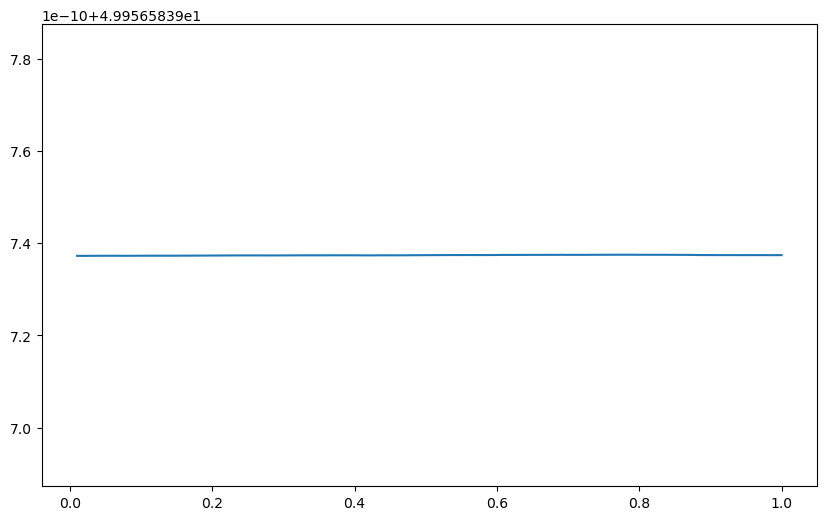

In [7]:
energy = 50
KE = 0.5*m*(L*omega)**2
U = m*g*L*np.degrees(theta)
#omega = np.sqrt((-2*g*np.degrees(theta))/L)
omega = np.sqrt(2*((50/m)-g*L*np.degrees(theta)))/L



plt.figure(figsize=(10,6))
plt.plot(t_3_quad, energy_quad)

print(np.degrees(np.cos(50)), np.cos(50))